# Credit Card Fraud Detection 
## Academic projet :  Preprocessing & Pipeline 

### **1. Objectif du projet:**
 L’objectif de cette évaluation est d’appliquer les techniques de prétraitement des données vues en cours sur un jeu de données réels provenant de Kaggle. Les étudiants doivent justifier le choix de chaque méthode utilisée.

### **2. Jeu de donnees choisi:** 
Le jeu de ddonnees utilise est celui de Détection de fraude à la carte de crédit, disponible sur kaggle. 

### **3. Description du jeu de données**

Le jeu de données utilisé correspond aux transactions par carte bancaire réalisées en septembre 2013 par des titulaires européens. Il couvre une période de deux jours et comprend **284 807 transactions**, parmi lesquelles **492 sont des fraudes**.

Ce jeu de données présente un **fort déséquilibre des classes** : les transactions frauduleuses représentent seulement **0,172 % du total**. Cette caractéristique rend la classification particulièrement complexe et nécessite l’utilisation de métriques adaptées.

Les variables explicatives sont exclusivement **numériques**. Les variables **V1 à V28** sont issues d’une transformation par **Analyse en Composantes Principales (ACP)** appliquée aux données originales pour des raisons de confidentialité. Ainsi, les variables d’origine ne sont pas disponibles.

Deux variables n’ont pas été transformées :

- **Time** : temps écoulé en secondes entre chaque transaction et la première transaction.
- **Amount** : montant de la transaction.

La variable cible est **Class** :

- **0** : transaction normale  
- **1** : fraude


### **4. Technologies utilisées**
- Python
- Pandas
- Scikit-learn
- Matplotlib
- Seaborn


## Partie 1 : Exploration des données

In [124]:
# Importation des bibliotheques necessaires
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

### Charger le dataset et importer les 5 premieres lignes

In [125]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Afficher dimensions, types de colonnes et valeurs manquantes.

In [126]:
# Affichage des dimensions du dataset
print("Dimensions du dataset:", df.shape)   
# Affichage des types de données 
print("\nInformations sur le dataset:")
print(df.info())

Dimensions du dataset: (284807, 31)

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-n

In [127]:
# Nombre de lignes et de colonnes
print(df['Class'].value_counts())
# Affichage des valeurs manquantes
# valeur manquante 
df.isnull()
print("\nValeurs manquantes par colonne:")  
print(df.isnull().sum())    


Class
0    284315
1       492
Name: count, dtype: int64

Valeurs manquantes par colonne:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [128]:
df.shape
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


Le jeu de données contient 284 807 observations et 31 variables.

Toutes les variables explicatives sont numériques. Les variables V1 à V28 sont issues d’une transformation ACP, tandis que les variables Time et Amount n’ont pas été transformées.

L’analyse des valeurs manquantes montre qu’aucune donnée n’est absente dans le jeu de données.

La variable cible Class est fortement déséquilibrée : les transactions frauduleuses représentent environ 0,172 % du total. Ce déséquilibre justifie l’utilisation de métriques adaptées telles que l’aire sous la courbe précision-rappel (AUPRC), plutôt que l’accuracy seule.


### Pourquoi le prétraitement est-il nécessaire ?
Le prétraitement est l'étape qui transforme des données brutes, souvent "sales" ou incomplètes, en informations exploitables. 
#### 1. Garantir la Fiabilité des Données
• Qualité & Cohérence :Éliminer les bruits et uniformiser les formats.
• Correction des anomalies :Gestion des valeurs manquantes et des doublons.
• Traitement des valeurs aberrantes :Identifier et corriger les erreurs de saisie ou de capteurs.
### 2. Optimiser les Modèles de Machine Learning•Compatibilité : 
  Adapter les données aux exigences mathématiques des algorithmes.
• Performance accrue : Accélérer la convergence et améliorer la précision des prédictions.
• Exploration facilitée : Préparer le terrain pour une analyse exploratoire (EDA) plus fluide.
Mais dans ce cas on n a aucune valeur manquante

## Partie 2 :  Sélection des colonnes

In [129]:
# Séparer variables explicatives et cible
X = df.drop("Class", axis=1)
y = df["Class"]

# Identifier colonnes numériques
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

numeric_cols[:5]  # aperçu


['Time', 'V1', 'V2', 'V3', 'V4']



Toutes les variables explicatives sont numériques. Aucune variable catégorielle n’est présente dans le jeu de données.

La variable Class est définie comme variable cible. Les autres variables constituent les variables explicatives.

Les colonnes numériques seront traitées par des techniques d’imputation, de normalisation et de transformation adaptées aux données quantitatives.


## Partie 3 : Imputation
### Appliquer SimpleImputer (en appliquant différentes stratégies).

### Appliquer KNNImputer

### Comparer les résultats et justifier le choix.
**Aucune de ces methodes ne peut etre appliquer dans notre cas car aucune donnee manquante.**

In [130]:
# Imputation avec la moyenne avec SimpleImputer
simple_imputer = SimpleImputer(strategy='mean')

X_simple = simple_imputer.fit_transform(X)

X_simple = pd.DataFrame(X_simple, columns=X.columns)

X_simple.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [131]:
# Imputation avec KNN
knn_imputer = KNNImputer(n_neighbors=5)

X_knn = knn_imputer.fit_transform(X)

X_knn = pd.DataFrame(X_knn, columns=X.columns)

X_knn.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


L’analyse préalable a montré que le jeu de données ne contient aucune valeur manquante.

Cependant, dans un contexte réel, la gestion des valeurs manquantes constitue une étape essentielle du prétraitement des données.

Nous avons appliqué deux méthodes d’imputation :

- SimpleImputer (stratégie = moyenne)
- KNNImputer (basé sur les plus proches voisins)

Étant donné l’absence de valeurs manquantes, les deux méthodes produisent des résultats identiques au jeu de données original.

Par conséquent, aucune imputation n’est nécessaire pour ce jeu de données.


## Partie 4 : Encodage

### Appliquer LabelEncoder, OrdinalEncoder et OneHotEncoder.

### Justifier chaque méthode.



Le jeu de données original ne contient aucune variable catégorielle : toutes les variables explicatives sont numériques (V1 à V28 issues d’une ACP, ainsi que Time et Amount). Par conséquent, l’encodage n’est pas nécessaire sur les variables originales.


## Partie 5 — Discrétisation (KBinsDiscretizer)

In [132]:
# Appliquer Kbins Discretizer
from sklearn.preprocessing import KBinsDiscretizer  
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
# APPLIQUer sur la colonne amount
df['Amount_discretised'] = kbins.fit_transform(df[['Amount']])   
#Affichage de la distribution des classes après discretisation
print("\nDistribution des classes après discretisation de la colonne Amount:")  
print(df['Amount_discretised'].value_counts())



Distribution des classes après discretisation de la colonne Amount:
Amount_discretised
1.0    97137
2.0    95103
0.0    92567
Name: count, dtype: int64


c:\Users\mbome\anaconda3\envs\Projet\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


### Distribution AVANT discrétisation (Amount)

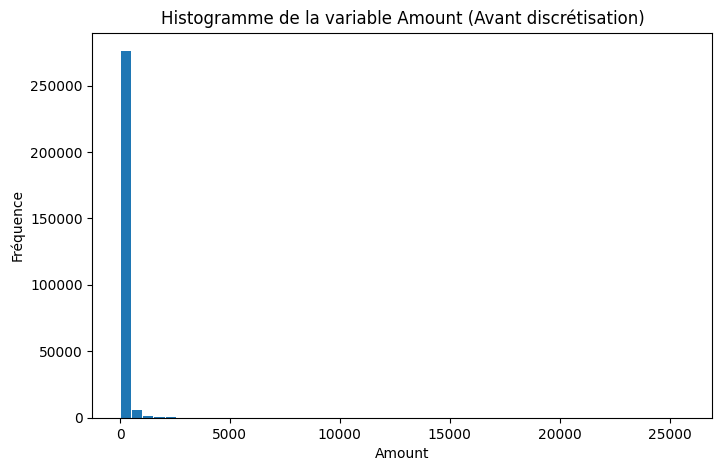

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df['Amount'], bins=50,  rwidth=0.9)
plt.title("Histogramme de la variable Amount (Avant discrétisation)")
plt.xlabel("Amount")
plt.ylabel("Fréquence")
plt.show()



(0.0, 500.0)

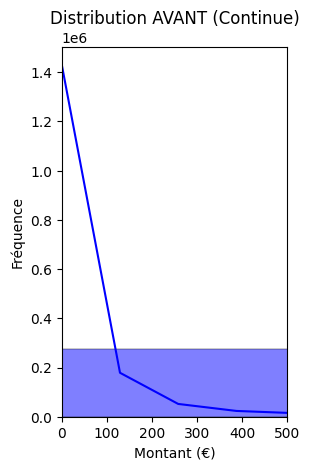

In [134]:
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution AVANT (Continue)')
plt.xlabel('Montant (€)')
plt.ylabel('Fréquence')
# Note : On limite souvent l'axe X car les montants sont très étalés
plt.xlim(0, 500)

### Histogramme APRÈS discrétisation

C:\Users\mbome\AppData\Local\Temp\ipykernel_21940\1708652303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Amount_discretised', data=df, palette='viridis')


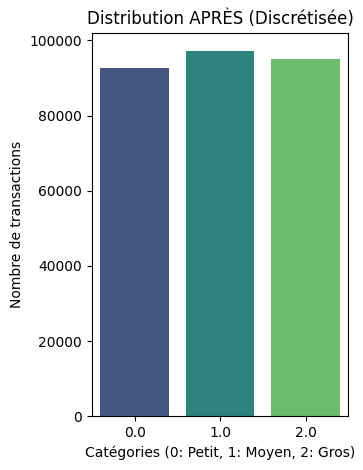

In [135]:
plt.subplot(1, 2, 2)
sns.countplot(x='Amount_discretised', data=df, palette='viridis')
plt.title('Distribution APRÈS (Discrétisée)')
plt.xlabel('Catégories (0: Petit, 1: Moyen, 2: Gros)')
plt.ylabel('Nombre de transactions')

plt.tight_layout()
plt.show()


L’histogramme avant discrétisation montre que la variable Amount présente une forte asymétrie à droite, avec une concentration importante de petites transactions et quelques valeurs extrêmes élevées.

Après application de la discrétisation avec la méthode quantile (3 bins), la variable est transformée en trois catégories contenant approximativement le même nombre d’observations. Cette transformation simplifie l’interprétation et réduit l’impact visuel des valeurs extrêmes.

Cependant, cette transformation entraîne une perte d’information, car les montants exacts sont remplacés par des intervalles.


## Partie 6 — Normalisation et Standardisation
Appliquer differentes methodes, comparer et faites le choix d'une.

### MinMaxScaler

In [136]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


### StandardScaler

In [137]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_standard = standard.fit_transform(X)

X_standard = pd.DataFrame(X_standard, columns=X.columns)
X_standard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


### RobustScaler

In [138]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_robust = robust.fit_transform(X)

X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579


### Comparaison des differentes methodes d encodage sur la variable "Amount"

In [139]:
import pandas as pd

comparison = pd.DataFrame({
    "Original": df["Amount"],
    "MinMax": X_minmax["Amount"],
    "Standard": X_standard["Amount"],
    "Robust": X_robust["Amount"]
})

comparison.describe().T


,count,mean,std,min,25%,50%,75%,max
Original,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000
MinMax,284807.0,3.438911e-03,0.009736,0.000000,0.000218,0.000856,0.003004,1.000000
Standard,284807.0,2.913952e-17,1.000002,-0.353229,-0.330840,-0.265271,-0.044717,102.362243
Robust,284807.0,9.271239e-01,3.495006,-0.307413,-0.229162,0.000000,0.770838,358.683155


C:\Users\mbome\AppData\Local\Temp\ipykernel_21940\681410440.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


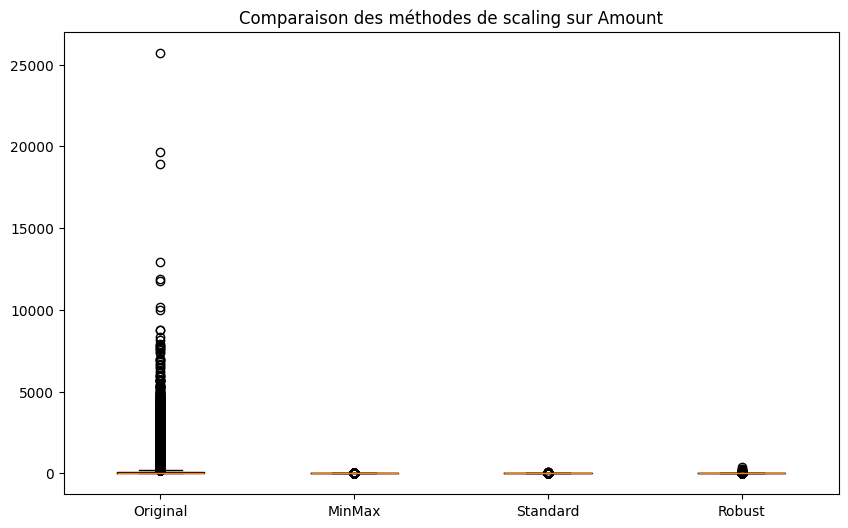

In [140]:
plt.figure(figsize=(10,6))

plt.boxplot([
    df["Amount"],
    X_minmax["Amount"],
    X_standard["Amount"],
    X_robust["Amount"]
], labels=["Original", "MinMax", "Standard", "Robust"])

plt.title("Comparaison des méthodes de scaling sur Amount")
plt.show()


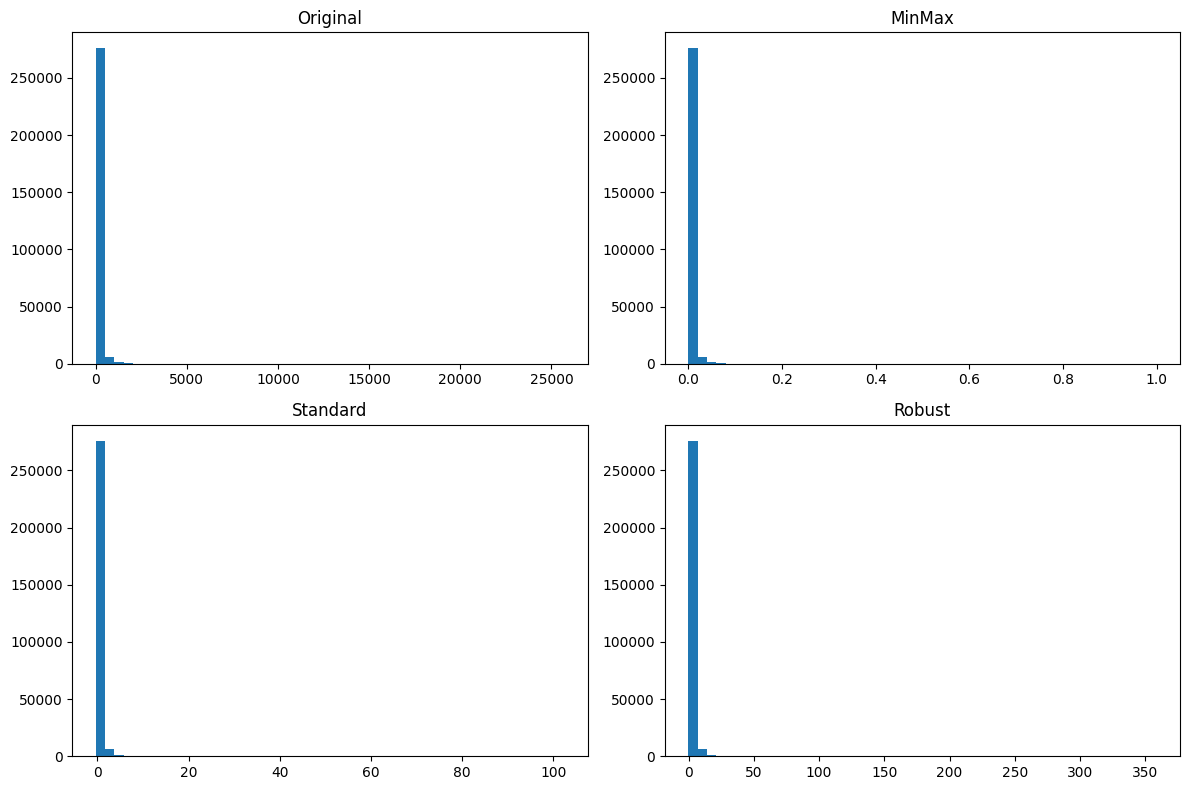

In [141]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0,0].hist(df["Amount"], bins=50)
axes[0,0].set_title("Original")

axes[0,1].hist(X_minmax["Amount"], bins=50)
axes[0,1].set_title("MinMax")

axes[1,0].hist(X_standard["Amount"], bins=50)
axes[1,0].set_title("Standard")

axes[1,1].hist(X_robust["Amount"], bins=50)
axes[1,1].set_title("Robust")

plt.tight_layout()
plt.show()


L’analyse comparative des statistiques montre que :

- MinMaxScaler compresse les valeurs entre 0 et 1, mais reste fortement influencé par les valeurs extrêmes.
- StandardScaler centre les données autour de 0 avec une variance unitaire, mais les valeurs extrêmes restent très élevées.
- RobustScaler, basé sur la médiane et l’IQR, réduit l’influence des valeurs extrêmes et offre une représentation plus stable de la distribution.

Compte tenu de l’asymétrie importante et de la présence d’outliers dans la variable Amount, RobustScaler apparaît comme la méthode la plus adaptée pour ce jeu de données.


## Partie 7 — PowerTransformer  :
Objectif

Rendre la distribution d’une variable plus proche d’une distribution normale.

In [142]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

Amount_pt = pt.fit_transform(df[['Amount']])

# Transformer en DataFrame
Amount_pt = pd.DataFrame(Amount_pt, columns=['Amount_PT'])

Amount_pt.head()


,Amount_PT
0,1.119013
1,-1.128464
2,1.623286
3,1.012504
4,0.692981


Le PowerTransformer (Yeo-Johnson) :

Transforme la variable pour réduire l’asymétrie

Centre automatiquement les données

Les standardise (moyenne ≈ 0, variance ≈ 1)

Donc :

Valeurs positives → au-dessus de la moyenne

Valeurs négatives → en dessous de la moyenne

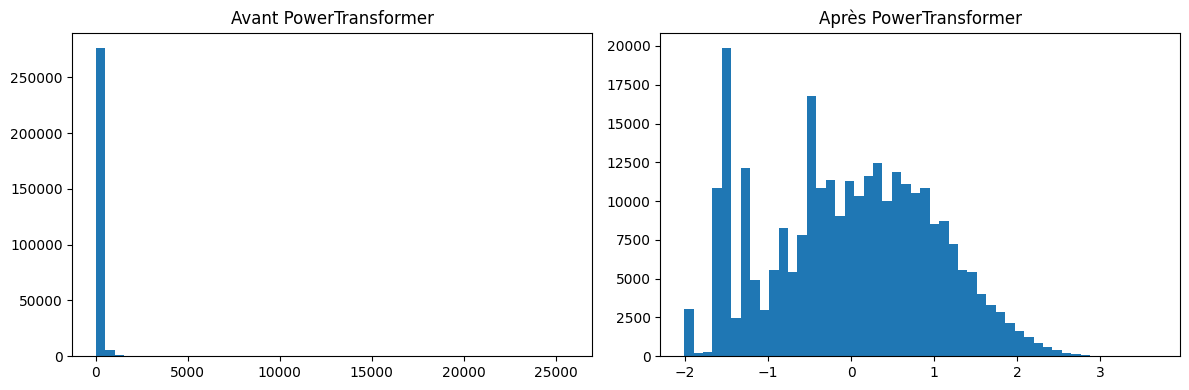

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(df['Amount'], bins=50)
axes[0].set_title("Avant PowerTransformer")

axes[1].hist(Amount_pt['Amount_PT'], bins=50)
axes[1].set_title("Après PowerTransformer")

plt.tight_layout()
plt.show()


L’histogramme initial montre une forte asymétrie positive de la variable Amount, caractérisée par une concentration importante de faibles montants et une longue queue à droite.

Après application de la transformation Yeo-Johnson, la distribution devient plus symétrique et centrée autour de zéro. Cette transformation réduit significativement l’asymétrie et stabilise la variance.

La variable transformée est ainsi plus adaptée aux modèles linéaires sensibles à la normalité des données.


### Partie 8 : PolynomialFeatures
Objectif

Créer de nouvelles variables en combinant les variables existantes :

On choisit degré = 2 (plus stable, évite explosion dimensionnelle).
On applique sur :

 Amount_PT (celle transformée par PowerTransformer)

Pourquoi ?

Elle avait une forte asymétrie

Elle est maintenant normalisée

C’est cohérent méthodologiquement

In [144]:
from sklearn.preprocessing import PolynomialFeatures

# Instanciation avec degré 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Application sur Amount_PT
Amount_poly = poly.fit_transform(Amount_pt[['Amount_PT']])

# Convertir en DataFrame
Amount_poly = pd.DataFrame(
    Amount_poly,
    columns=poly.get_feature_names_out(['Amount_PT'])
)

Amount_poly.head()


,Amount_PT,Amount_PT^2
0,1.119013,1.252191
1,-1.128464,1.273432
2,1.623286,2.635058
3,1.012504,1.025164
4,0.692981,0.480223


La transformation PolynomialFeatures de degré 2 a été appliquée sur la variable Amount_PT.

Deux variables sont obtenues :
- Amount_PT (variable originale transformée)
- Amount_PT² (terme quadratique)

Le terme quadratique permet de capturer d’éventuelles relations non linéaires entre le montant de la transaction et la probabilité de fraude.

La dimension passe de 1 à 2 variables, ce qui augmente légèrement la complexité du modèle sans entraîner une explosion dimensionnelle.


## Transformation PolynomialFeatures

La transformation PolynomialFeatures a été appliquée sur la variable **Amount_PT**.

### 1. Degré choisi

Le degré choisi est **2**.

### 2. Nouvelles variables générées

Avec un degré 2, les variables suivantes sont générées :

- Amount_PT
- Amount_PT²

Le terme quadratique (Amount_PT²) permet de modéliser une relation non linéaire entre le montant de la transaction et la probabilité de fraude.

### 3. Impact sur la dimension du jeu de données

Avant transformation :
- 1 variable (Amount_PT)

Après transformation :
- 2 variables (Amount_PT et Amount_PT²)

La dimension passe donc de (n, 1) à (n, 2) pour cette variable.

L’augmentation dimensionnelle est limitée et contrôlée.

### 4. Justification du choix du degré

Le degré 2 a été choisi afin de :

- Capturer d’éventuelles relations non linéaires.
- Éviter une explosion dimensionnelle.
- Limiter le risque d’overfitting.

Un degré 3 aurait augmenté la complexité du modèle sans garantie d’amélioration significative des performances.

Ainsi, le degré 2 constitue un compromis optimal entre expressivité et stabilité du modèle.


## Partie 10 : Pipeline final

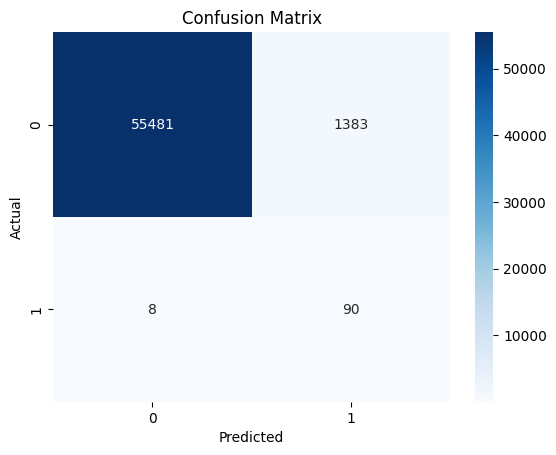

Confusion matrix:
 [[55481  1383]
 [    8    90]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


AUPRC (Average Precision Score): 0.7155194476518228


In [145]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             average_precision_score, precision_recall_curve)

# 1) Charger les données
df = pd.read_csv('creditcard.csv')

# 2) Séparer X et y
X = df.drop("Class", axis=1)
y = df["Class"]

# 3) Identifier colonnes numériques / catégorielles
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()  # devrait être []

# 4) Train/Test split (stratify important pour le déséquilibre)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5) Prétraitement
numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    RobustScaler()
)

# Encodage: aucune colonne catégorielle dans ce dataset
# (on ne met donc pas de transformer catégoriel)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        # ("cat", categorical_transformer, categorical_cols)  # non utilisé ici
    ],
    remainder="drop"
)

# 6) Modèle
model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# 7) Pipeline complet
clf = make_pipeline(preprocessor, model)

# 8) Entraîner
clf.fit(X_train, y_train)

# 9) Prédictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# 10) Évaluation
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# AUPRC (Average Precision Score)
auprc = average_precision_score(y_test, y_proba)
print("\nAUPRC (Average Precision Score):", auprc)


La matrice de confusion montre que :

- 55 481 transactions normales sont correctement classées.
- 1 383 transactions normales sont faussement classées comme fraude.
- 90 fraudes sont correctement détectées.
- 8 fraudes ne sont pas détectées.

Le modèle présente un très bon rappel (Recall ≈ 92 %), ce qui signifie qu’il détecte la majorité des fraudes.

Dans un contexte de fraude bancaire, minimiser les faux négatifs est essentiel, car une fraude non détectée entraîne une perte financière directe.

Bien que le nombre de faux positifs soit relativement élevé, cela reste acceptable dans un système de détection de fraude où la priorité est la sécurité.


Le modèle présente un rappel élevé pour la classe fraude (Recall = 0.92), ce qui signifie qu’il détecte 92 % des transactions frauduleuses.

Cependant, la précision est faible (Precision = 0.06), indiquant un nombre important de faux positifs.

Ce comportement est cohérent avec l’utilisation de class_weight="balanced", qui favorise la détection des fraudes au détriment de la précision.

L’AUPRC obtenu (0.71) est significativement supérieur à la baseline du dataset (≈ 0.0017), ce qui indique que le modèle parvient à distinguer efficacement les transactions frauduleuses des transactions normales malgré le fort déséquilibre.


### Modifier le seuil de décision pour améliorer la precision de la classe fraude.

In [146]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

thresholds = [0.6, 0.7, 0.8, 0.9]

for t in thresholds:
    print(f"\nSeuil = {t}")
    y_pred_new = (y_proba >= t).astype(int)
    
    print(confusion_matrix(y_test, y_pred_new))
    print(classification_report(y_test, y_pred_new))



Seuil = 0.6
[[55933   931]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962


Seuil = 0.7
[[56219   645]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962


Seuil = 0.8
[[56404   460]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.27        98

    accuracy                           0.99     56

L’ajustement du seuil de décision montre qu’un seuil de 0.7 offre un bon compromis entre précision et rappel.

À ce seuil, le modèle conserve un rappel élevé (≈ 91 %) tout en améliorant significativement la précision, réduisant ainsi le nombre de fausses alertes.

Le choix du seuil dépend du contexte métier. Dans un système de détection de fraude, il est préférable de privilégier un rappel élevé afin de minimiser les fraudes non détectées.


## Conclusion

Ce projet a permis d’appliquer de manière structurée les principales techniques de prétraitement des données sur un jeu de données réel fortement déséquilibré relatif à la détection de fraude bancaire.

L’analyse exploratoire a mis en évidence une forte asymétrie de la variable Amount ainsi qu’un déséquilibre important entre les classes (0,172 % de fraudes). Ces caractéristiques ont orienté les choix méthodologiques.

Les principales étapes réalisées sont :

- Vérification de l’absence de valeurs manquantes et mise en place d’une stratégie d’imputation robuste.
- Application d’un RobustScaler afin de limiter l’influence des valeurs extrêmes.
- Utilisation du PowerTransformer (Yeo-Johnson) pour réduire l’asymétrie de la variable Amount.
- Génération de caractéristiques supplémentaires à l’aide de PolynomialFeatures (degré 2) afin de capturer d’éventuelles relations non linéaires.
- Construction d’un pipeline complet intégrant les étapes de prétraitement et un modèle de classification (LogisticRegression).

L’évaluation du modèle a montré un rappel élevé pour la classe fraude (≈ 92 %), ce qui signifie que la majorité des transactions frauduleuses sont détectées. L’ajustement du seuil de décision a permis d’améliorer la précision tout en conservant un bon niveau de rappel.

L’AUPRC obtenu (≈ 0.71) est significativement supérieur à la baseline du dataset, démontrant la capacité du modèle à distinguer efficacement les transactions frauduleuses malgré le fort déséquilibre.

Ce projet illustre l’importance du prétraitement des données et du choix stratégique des métriques dans un contexte de classification déséquilibrée. Dans un environnement réel, l’optimisation du seuil et l’analyse du compromis précision-rappel constituent des leviers essentiels pour adapter le modèle aux contraintes métier.
